# BreastCancer_PCA_Ensemple_Training2

here are using a range of techniques to build a model

**Importing all required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression


from sklearn.tree import DecisionTreeClassifier

from sklearn.decomposition import PCA

#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.metrics import accuracy_score,recall_score,confusion_matrix

from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import GridSearchCV

In [3]:
#%cd "C:\Users\hp\Downloads"

In [4]:
from pandas import read_csv
df=read_csv("2_breast-cancer-data.csv")
df['diagnosis'] = df['diagnosis'].replace('M',1)
#M cancerous
df['diagnosis'] = df['diagnosis'].replace('B',0)
#B non cancer
X =df.iloc[:,2:32].values
y =df.iloc[:,1:2].values

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Aapply algorithms on non standard data**

In [6]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
#expects a 1-d vector
#else it throws an error
y1_train=y1_train.ravel(order='F')


In [7]:
y1_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

**Logistic**

In [8]:
logit1 = LogisticRegression(random_state = 0)
logit1.fit(X1_train, y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [9]:
acl1=accuracy_score(y1_test,logit1.predict(X1_test))
print(acl1)

0.9473684210526315


In [10]:
cml1= confusion_matrix(y1_test, logit1.predict(X1_test))
print(cml1)

[[63  4]
 [ 2 45]]


**Decision Tree classifier**

In [11]:
dec1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dec1.fit(X1_train, y1_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [12]:
acd1=accuracy_score(y1_test,dec1.predict(X1_test))
print(acd1)

0.9298245614035088


# Ensemble

Ensemble Algorithm, it uses all the different Alogrithms that we have implemented and take the best Algorithms to make predictions

# VotingClassifier

here Voting Classing is used to implement an ensemble algorithm that has a mix of all the other alogrithms

In [13]:
#VotingClassifier(

In [14]:
#create a dictionary of our models
estimators=[('logit1' ,logit1), ('dec1',dec1)]
#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators)
#VotingClassifier(

#fit model to training data
ensemble.fit(X1_train, y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('logit1', LogisticRegression(random_state=0)),
                             ('dec1',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0))])

In [15]:
ace1=accuracy_score(y1_test,ensemble.predict(X1_test))
ace1

0.9385964912280702

**On Standardized data**

In [16]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y2_train=y2_train.ravel(order='F')
sc = StandardScaler()

X2_train = sc.fit_transform(X2_train)
X2_test = sc.transform(X2_test)



In [17]:
X2_train[0:5,:]

array([[-1.15036482, -0.39064196, -1.12855021, -0.95876358,  0.3109837 ,
        -0.5959945 , -0.80259612, -0.80249002,  0.29453906,  0.0942515 ,
        -0.4950523 ,  1.48720153, -0.51448782, -0.49154005,  0.28149837,
        -0.60451206, -0.46900701, -0.61170002,  0.05798237, -0.35763702,
        -1.0431756 ,  0.21353282, -1.0360446 , -0.84880771,  0.34249851,
        -0.73009743, -0.81232053, -0.75798367, -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, -0.82152548, -0.60963604,
        -0.90986721, -0.66066905, -0.89871612,  0.75493453, -0.42547082,
        -0.33381757,  0.75941203, -0.28751805, -0.42127695, -0.1620797 ,
        -0.20486693, -0.05029632, -0.20309076, -0.25469005, -0.39139463,
        -0.71565415,  1.06684183, -0.68992205, -0.66869703, -0.09553745,
        -0.53786647, -0.37504806, -0.60687023,  0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098,  0.40858627, -0.10616078,
        -0.36301886, -0.41799048, -0.08844569, -0

**Logistic Regression Classifier**

In [18]:
logit2 = LogisticRegression(random_state = 0)
logit2.fit(X2_train, y2_train)

LogisticRegression(random_state=0)

In [19]:
acl2=accuracy_score(y2_test,logit2.predict(X2_test))

In [20]:
print(acl2)

0.9649122807017544


In [21]:
cml2= confusion_matrix(y2_test, logit2.predict(X2_test))
print(cml2)

[[65  2]
 [ 2 45]]


**Decision Tree**

In [22]:
dec2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dec2.fit(X2_train, y2_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [23]:
acd2=accuracy_score(y2_test,dec2.predict(X2_test))
print(acd2)

0.9298245614035088


In [24]:
cmd2= confusion_matrix(y2_test, dec2.predict(X2_test))
print(cmd2)

[[62  5]
 [ 3 44]]


In [25]:
#create a dictionary of our models
estimators=[('logit2' ,logit2), ('dec2',dec2)]
#create our voting classifier, inputting our models
ensemble2 = VotingClassifier(estimators)
#fit model to training data
ensemble2.fit(X2_train, y2_train)

VotingClassifier(estimators=[('logit2', LogisticRegression(random_state=0)),
                             ('dec2',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0))])

In [26]:
ace2=accuracy_score(y2_test,ensemble2.predict(X2_test))
ace2

0.9473684210526315

# **PCA on Non Standard Data** (Raw Data) - PCA will not work

Here the Non Standard data, which is the Raw data (original Breast Cancer Data)

Here the PCA will not work well because we are applying PCA on Non-Standard Data. PCA works best when data is standardized

Ideally, PCA should always be run on NON Standardized data

In [27]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y3_train=y3_train.ravel(order='F')

In [28]:
XB3_train= X3_train
X3_train[0:5,:]

array([[1.005e+01, 1.753e+01, 6.441e+01, 3.108e+02, 1.007e-01, 7.326e-02,
        2.511e-02, 1.775e-02, 1.890e-01, 6.331e-02, 2.619e-01, 2.015e+00,
        1.778e+00, 1.685e+01, 7.803e-03, 1.449e-02, 1.690e-02, 8.043e-03,
        2.100e-02, 2.778e-03, 1.116e+01, 2.684e+01, 7.198e+01, 3.840e+02,
        1.402e-01, 1.402e-01, 1.055e-01, 6.499e-02, 2.894e-01, 7.664e-02],
       [1.080e+01, 2.198e+01, 6.879e+01, 3.599e+02, 8.801e-02, 5.743e-02,
        3.614e-02, 1.404e-02, 2.016e-01, 5.977e-02, 3.077e-01, 1.621e+00,
        2.240e+00, 2.020e+01, 6.543e-03, 2.148e-02, 2.991e-02, 1.045e-02,
        1.844e-02, 2.690e-03, 1.276e+01, 3.204e+01, 8.369e+01, 4.895e+02,
        1.303e-01, 1.696e-01, 1.927e-01, 7.485e-02, 2.965e-01, 7.662e-02],
       [1.614e+01, 1.486e+01, 1.043e+02, 8.000e+02, 9.495e-02, 8.501e-02,
        5.500e-02, 4.528e-02, 1.735e-01, 5.875e-02, 2.387e-01, 6.372e-01,
        1.729e+00, 2.183e+01, 3.958e-03, 1.246e-02, 1.831e-02, 8.747e-03,
        1.500e-02, 1.621e-03, 1.771e

In [29]:
pca = PCA()
X3_train = pca.fit_transform(X3_train)
X3_test = pca.transform(X3_test)
explained_variance = pca.explained_variance_ratio_

In [30]:
X3_train[0:5,:]

array([[-6.04753682e+02, -3.88235725e+01,  1.27036258e+01,
         2.59617055e+00, -5.43578720e+00,  1.45652735e+00,
         1.77071316e+00, -5.35811897e-01,  1.58740280e-01,
         1.66681516e-01, -1.93646857e-02, -8.34729499e-02,
        -8.11518615e-03,  1.65807278e-02,  5.69828812e-03,
        -2.66906996e-03, -1.07925768e-02,  6.83021910e-03,
        -8.27739868e-03, -1.05989811e-02, -1.19055676e-03,
        -3.30076795e-03,  4.54096444e-03,  6.37557286e-04,
        -1.35387370e-03,  1.78367587e-03,  3.98453895e-04,
         1.65606568e-03, -6.79165096e-04,  7.15960483e-05],
       [-4.88463997e+02, -5.10471286e+01,  9.05491820e+00,
        -5.66222595e+00, -6.06456019e+00,  2.83022379e+00,
         4.05100468e-01,  8.51387188e-02, -2.50357093e-01,
         7.50227379e-02, -1.26541477e-02, -9.57397265e-03,
        -3.67721770e-02,  2.53020514e-02,  1.72513655e-03,
         6.93037694e-03,  6.38961524e-03, -6.24194632e-03,
        -2.76764761e-02, -5.06618706e-03, -6.86171870e-

In [31]:
XB3_train[0:5,:]

array([[1.005e+01, 1.753e+01, 6.441e+01, 3.108e+02, 1.007e-01, 7.326e-02,
        2.511e-02, 1.775e-02, 1.890e-01, 6.331e-02, 2.619e-01, 2.015e+00,
        1.778e+00, 1.685e+01, 7.803e-03, 1.449e-02, 1.690e-02, 8.043e-03,
        2.100e-02, 2.778e-03, 1.116e+01, 2.684e+01, 7.198e+01, 3.840e+02,
        1.402e-01, 1.402e-01, 1.055e-01, 6.499e-02, 2.894e-01, 7.664e-02],
       [1.080e+01, 2.198e+01, 6.879e+01, 3.599e+02, 8.801e-02, 5.743e-02,
        3.614e-02, 1.404e-02, 2.016e-01, 5.977e-02, 3.077e-01, 1.621e+00,
        2.240e+00, 2.020e+01, 6.543e-03, 2.148e-02, 2.991e-02, 1.045e-02,
        1.844e-02, 2.690e-03, 1.276e+01, 3.204e+01, 8.369e+01, 4.895e+02,
        1.303e-01, 1.696e-01, 1.927e-01, 7.485e-02, 2.965e-01, 7.662e-02],
       [1.614e+01, 1.486e+01, 1.043e+02, 8.000e+02, 9.495e-02, 8.501e-02,
        5.500e-02, 4.528e-02, 1.735e-01, 5.875e-02, 2.387e-01, 6.372e-01,
        1.729e+00, 2.183e+01, 3.958e-03, 1.246e-02, 1.831e-02, 8.747e-03,
        1.500e-02, 1.621e-03, 1.771e

In [32]:
print(explained_variance)

[9.81870844e-01 1.62780337e-02 1.65248784e-03 1.05497183e-04
 8.18783017e-05 6.22259461e-06 3.75190365e-06 6.99443747e-07
 3.15377929e-07 1.68171848e-07 6.91807658e-08 1.46377183e-08
 7.05443482e-09 4.73776212e-09 2.41694905e-09 1.23671397e-09
 7.35417863e-10 5.00390287e-10 3.92785987e-10 3.21190973e-10
 1.50454023e-10 1.15835839e-10 7.44339861e-11 5.93766631e-11
 3.43198428e-11 2.42771322e-11 6.96416039e-12 5.73232335e-12
 3.24311861e-12 1.33754528e-12]


Scree Plot tell the explains the percentage of Variance when we apply PCA.
here below the because the data is non standardized, only the first PCA is explaining all the data set or is having the better variance, then rest of the variables

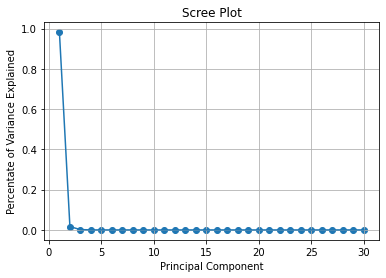

In [33]:
plt.scatter(range(1,31),explained_variance)
plt.plot(range(1,31),explained_variance)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentate of Variance Explained')
plt.grid()
plt.show()

In [34]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y3_train=y3_train.ravel(order='F')

pca = PCA(n_components=1), that is why we using 1 component based on the scree plot

In [35]:
pca = PCA(n_components=1)
X3_train = pca.fit_transform(X3_train)
X3_test = pca.transform(X3_test)
explained_variance = pca.explained_variance_ratio_

In [36]:
X3_train

array([[-604.75368202],
       [-488.46399712],
       [ 131.69599902],
       [-436.44878504],
       [-319.17014375],
       [-279.69081454],
       [-414.97156245],
       [-348.81143706],
       [-124.44003956],
       [-486.47733324],
       [ 980.07874163],
       [-429.52993919],
       [ -12.68264456],
       [-502.04441652],
       [-622.92710263],
       [-554.63857327],
       [ 652.18782413],
       [-555.33899519],
       [-270.96509343],
       [-272.47668881],
       [-487.43880995],
       [-482.46276054],
       [ -39.8494696 ],
       [  98.41889609],
       [2297.62928075],
       [-600.63258475],
       [-368.55322672],
       [-285.55491949],
       [1449.6816069 ],
       [-427.10641228],
       [-520.36816696],
       [1044.62272638],
       [-164.84450871],
       [ 278.30853914],
       [-381.96067927],
       [-192.21915778],
       [-373.38815774],
       [-159.89117665],
       [-686.81504049],
       [-192.36618993],
       [-658.0018545 ],
       [  45.272

**Logistic Regression Classifier using PCA**

In [37]:
logit3 = LogisticRegression(random_state = 0)
logit3.fit(X3_train, y3_train)

LogisticRegression(random_state=0)

In [38]:
acl3=accuracy_score(y3_test,logit3.predict(X3_test))
print(acl3)

0.9122807017543859


In [39]:
cml3= confusion_matrix(y3_test, logit3.predict(X3_test))
print(cml3)

[[64  3]
 [ 7 40]]


**Decision Tree Classifier using PCA**

In [40]:
dec3 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dec3.fit(X3_train, y3_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [41]:
acd3=accuracy_score(y3_test,dec3.predict(X3_test))
print(acd3)

0.8421052631578947


In [42]:
cmd3= confusion_matrix(y3_test, dec3.predict(X3_test))
print(cmd3)

[[56 11]
 [ 7 40]]


In [43]:
#create a dictionary of our models
estimators=[('logit3' ,logit3), ('dec3',dec3)]
#create our voting classifier, inputting our models
ensemble3 = VotingClassifier(estimators)
#fit model to training data
ensemble3.fit(X3_train, y3_train)

VotingClassifier(estimators=[('logit3', LogisticRegression(random_state=0)),
                             ('dec3',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0))])

In [44]:
ace3=accuracy_score(y3_test,ensemble3.predict(X3_test))
ace3

0.8859649122807017

# **PCA on Standardized Data**

PCA should always be run on Standardized data

In [45]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y4_train=y4_train.ravel(order='F')
sc = StandardScaler()
X4_train = sc.fit_transform(X4_train)
X4_test = sc.transform(X4_test)

In [46]:
X4_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [47]:
pca = PCA()
X4_train = pca.fit_transform(X4_train)
X4_test = pca.transform(X4_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[4.34307675e-01 1.97401146e-01 9.35177070e-02 6.67766058e-02
 5.64245165e-02 4.07161938e-02 2.14925398e-02 1.51269268e-02
 1.39676264e-02 1.16009156e-02 1.01216224e-02 8.97175303e-03
 7.71439121e-03 5.55309643e-03 3.11522438e-03 2.64580181e-03
 1.99647487e-03 1.70618303e-03 1.50414589e-03 1.06143766e-03
 9.94608221e-04 8.78454935e-04 7.24281209e-04 5.81085817e-04
 5.46645369e-04 2.61499457e-04 2.16152203e-04 4.62504070e-05
 2.53207432e-05 3.71910834e-06]


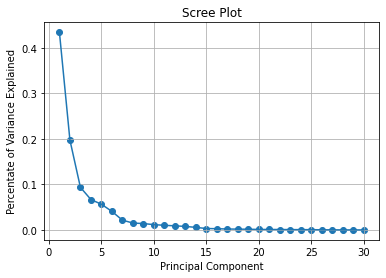

In [48]:
plt.scatter(range(1,31),explained_variance)
plt.plot(range(1,31),explained_variance)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Percentate of Variance Explained')
plt.grid()
plt.show()

Scree Plot tell the explains the percentage of Variance when we apply PCA.
Here above the data is  standardized, the scree plot is showing the PCA vs percentage of variance.THe char is showing from 1, 2 to 6 we get the components are  explaining  the data set or is having the better variance, then rest of the variables

In [49]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
y4_train=y4_train.ravel(order='F')
sc = StandardScaler()
X4_train = sc.fit_transform(X4_train)
X4_test = sc.transform(X4_test)

Based on the scree plot we are chosing components =6

In [50]:
pca = PCA(n_components=6)
X4_train = pca.fit_transform(X4_train)
X4_test = pca.transform(X4_test)
explained_variance = pca.explained_variance_ratio_

**Logistic Regression Classifier using PCA**

In [51]:
logit4 = LogisticRegression(random_state = 0)
logit4.fit(X4_train, y4_train)

LogisticRegression(random_state=0)

In [52]:
acl4=accuracy_score(y4_test,logit4.predict(X4_test))
print(acl4)

0.956140350877193


In [53]:
cml4= confusion_matrix(y4_test, logit4.predict(X4_test))
print(cml4)

[[65  2]
 [ 3 44]]


**Decision Tree Classifier using PCA**

In [54]:
dec4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dec4.fit(X4_train, y4_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [55]:
acd4=accuracy_score(y4_test,dec4.predict(X4_test))
print(acd4)

0.9298245614035088


In [56]:
cmd4= confusion_matrix(y4_test, dec4.predict(X4_test))
print(cmd4)

[[61  6]
 [ 2 45]]


In [57]:
#create a dictionary of our models
estimators=[('logit4', logit4), ('dec4', dec4)]
#create our voting classifier, inputting our models
ensemble4 = VotingClassifier(estimators)
#VotingClassifier(

#fit model to training data
ensemble4.fit(X4_train, y4_train)

VotingClassifier(estimators=[('logit4', LogisticRegression(random_state=0)),
                             ('dec4',
                              DecisionTreeClassifier(criterion='entropy',
                                                     random_state=0))])

In [58]:
ace4=accuracy_score(y4_test,ensemble4.predict(X4_test))
print(ace4)

0.956140350877193


In [59]:
data= {'Non standardized' :  [acl1  , acd1, ace1],
       'Standardized': [acl2,  acd2, ace2],
       'Non Standardized PCA' : [acl3,   acd3, ace3],
       'Standardized PCA' : [acl4,  acd4, ace4]}

In [60]:
models=['logistc Regression',  'Decision Tree', 'Ensemble Model']

In [61]:
Result=pd.DataFrame(data, index= models)

In [62]:
Result

,Non standardized,Standardized,Non Standardized PCA,Standardized PCA
logistc Regression,0.947368,0.964912,0.912281,0.956140
Decision Tree,0.929825,0.929825,0.842105,0.929825
Ensemble Model,0.938596,0.947368,0.885965,0.956140
